# Reading the Dataset

In [8]:
# import library and read dataset
import pandas as pd

df_reviews = pd.read_csv('IMDB Dataset.csv')

df_reviews

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [9]:
# take a sample of 10000 rows to make processing faster and get imbalance data
# 9000 positives
df_positive = df_reviews[df_reviews['sentiment']=='positive'][:9000]
# 1000 negative
df_negative = df_reviews[df_reviews['sentiment']=='negative'][:1000]

In [10]:
df_reviews_imb = pd.concat([df_positive, df_negative])

In [11]:
df_reviews_imb.value_counts('sentiment')

sentiment
positive    9000
negative    1000
Name: count, dtype: int64

# Dealing with Imbalanced Classes

<Axes: xlabel='sentiment'>

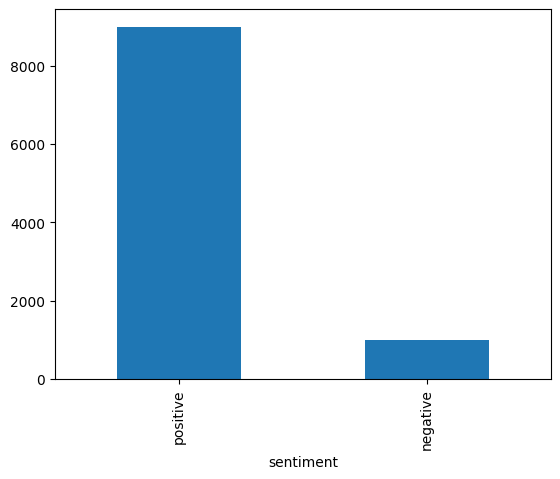

In [12]:
# make a barplot to show how data is distributed
df_reviews_imb.value_counts('sentiment').plot(kind='bar')

## Balancing data with .sample()

In [14]:
length_negative = len(df_reviews_imb[df_reviews_imb['sentiment'] == 'negative'])

In [15]:
# Undersampling

df_reviews_positive = df_reviews_imb[df_reviews_imb['sentiment']=='positive'].sample(n=length_negative)

In [16]:
df_reviews_negative = df_reviews_imb[df_reviews_imb['sentiment']=='negative']

In [17]:
df_reviews_bal = pd.concat([df_reviews_positive, df_reviews_negative])

In [18]:
df_reviews_bal.reset_index(drop=True, inplace=True)

In [19]:
df_reviews_bal.value_counts('sentiment')

sentiment
negative    1000
positive    1000
Name: count, dtype: int64

## Balancing data with RandomUnderSampler

In [20]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)

df_reviews_bal, df_reviews_bal['sentiment'] = rus.fit_resample(df_reviews_imb[['review']],df_reviews_imb['sentiment'])

In [21]:
df_reviews_bal.value_counts('sentiment')

sentiment
negative    1000
positive    1000
Name: count, dtype: int64

# Splitting data into train and test

In [22]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df_reviews_bal,test_size=0.33,random_state=42)

In [23]:
train_x,train_y = train['review'],train['sentiment']
test_x,test_y = test['review'],test['sentiment']

In [24]:

train_y.value_counts()

sentiment
negative    675
positive    665
Name: count, dtype: int64

# Text Representation (Bag of Works)

## Count Vectorizer

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]

df = pd.DataFrame({'review':['review1', 'review2'], 'text':text})
cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(df['text'])

In [30]:
df_dtm = pd.DataFrame(cv_matrix.toarray(), index=df['review'].values,
                      columns=cv.get_feature_names_out())

df_dtm

,code,hate,java,love,python,writing
review1,2,0,0,2,2,1
review2,2,2,2,0,0,1


## Tfidf

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]

df = pd.DataFrame({'review':['review1', 'review2'], 'text':text})
tfidf = TfidfVectorizer(stop_words='english', norm=None)
tfidf_matrix = tfidf.fit_transform(df['text'])

In [32]:
pd.DataFrame(tfidf_matrix.toarray(), index=df['review'].values,
                      columns=tfidf.get_feature_names_out())

,code,hate,java,love,python,writing
review1,2.0,0.00000,0.00000,2.81093,2.81093,1.0
review2,2.0,2.81093,2.81093,0.00000,0.00000,1.0


# Turning our text data into numerical vectors


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)

In [36]:
test_x_vector = tfidf.transform(test_x)

In [37]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names_out())

,00,000,007,01pm,02,04,08,10,100,1000,...,zooming,zooms,zues,zzzzzzzzzzzzzzzzzz,æon,élan,émigré,ísnt,ïn,ünfaithful
144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
742,0,0,0,0,0,0,0,0.042791,0,0,...,0,0,0,0,0,0,0,0,0,0
9464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Selection

## Support Vector Machines (SVM) - Supervised Alg

In [54]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [40]:
print(svc.predict(tfidf.transform(['A good movie'])))
print(svc.predict(tfidf.transform(['An excellent movie'])))
print(svc.predict(tfidf.transform(['I did not like this movie at all I gave this movie away'])))

['positive']
['positive']
['negative']


## Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)

,priors,None
,var_smoothing,1e-09


# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x_vector, train_y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# Model Evaluation

In [44]:
# calculate confusion matrix of svc
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y,
                 svc.predict(test_x_vector),
                 labels=['positive', 'negative'])

array([[290,  45],
       [ 60, 265]])

In [45]:
# calculate accuracy of all models

print(svc.score(test_x_vector, test_y))
print(dec_tree.score(test_x_vector, test_y))
print(gnb.score(test_x_vector.toarray(), test_y))
print(log_reg.score(test_x_vector, test_y))


# model.score(test_x_vector, test_y)

0.8409090909090909
0.6484848484848484
0.6348484848484849
0.8303030303030303


## F1 Score

In [46]:
from sklearn.metrics import f1_score

f1_score(test_y, svc.predict(test_x_vector),
         labels=['positive', 'negative'],
         average=None)

array([0.84671533, 0.83464567])

## Classification report

In [47]:
from sklearn.metrics import classification_report

print(classification_report(test_y,
                            svc.predict(test_x_vector),
                            labels=['positive', 'negative'],))

              precision    recall  f1-score   support

    positive       0.83      0.87      0.85       335
    negative       0.85      0.82      0.83       325

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



# Tuning the Model

## GridSearchCV

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    "kernel": ["linear", "rbf"],
    "C": [0.1, 1, 3, 10, 30, 100],
    "gamma": ["scale", "auto", 0.1, 0.03, 0.01, 0.003]  # only used by rbf
}

svc = SVC()
svc_grid = GridSearchCV(svc, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
svc_grid.fit(train_x_vector, train_y)

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': ['scale', 'auto', ...], 'kernel': ['linear', 'rbf']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [50]:
# Best combination of hyperparameters
print(svc_grid.best_params_)

{'C': 1, 'kernel': 'linear'}


In [51]:
# Best average cross-validation score
print(svc_grid.best_score_)

0.823134328358209


## Comparison

In [55]:
# Accuracy on test set BEFORE tuning
base_acc = svc.score(test_x_vector, test_y)
print(f"Base Model Accuracy: {base_acc:.4f}")


Base Model Accuracy: 0.8409


In [60]:
# Tuned model (after grid search)
best_svc = svc_grid.best_estimator_

# Accuracy on test set AFTER tuning
tuned_acc = best_svc.score(test_x_vector, test_y)
print(f"Tuned Model Accuracy: {tuned_acc:.4f}")

Tuned Model Accuracy: 0.8409
